In [53]:
import pandas as pd
import numpy as np


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.utils import to_categorical

# read from dataset
dataset = pd.read_csv("exercise_dataset.csv")

X = dataset.drop("exercise", axis=1)
y = dataset["exercise"]

# set up the label encoding
exercises = y.unique()
exercise_map = {exercise:i for i, exercise in enumerate(exercises)}

y_encoded = y.map(exercise_map).values
y_encoded = to_categorical(y_encoded, num_classes=len(exercises))


In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# preprocess the features
numerical_features = ["age", "weight", "height"]
categorical_features = ["injury_type", "goal"]

scaler = StandardScaler()
X_numerical = scaler.fit_transform(X[numerical_features])

encoder = OneHotEncoder(sparse_output=False)
X_categorical=encoder.fit_transform(X[categorical_features])

X_preprocessed = np.hstack((X_numerical, X_categorical))


In [56]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y_encoded, test_size=0.2, random_state=42
)

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.metrics import TopKCategoricalAccuracy

# Build and compile the model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(len(exercises), activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", TopKCategoricalAccuracy(k=3)])



In [58]:
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1921 - loss: 2.4287 - top_k_categorical_accuracy: 0.4346 - val_accuracy: 0.3445 - val_loss: 1.5908 - val_top_k_categorical_accuracy: 0.7760
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3413 - loss: 1.6498 - top_k_categorical_accuracy: 0.7457 - val_accuracy: 0.3540 - val_loss: 1.4055 - val_top_k_categorical_accuracy: 0.7855
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3557 - loss: 1.5089 - top_k_categorical_accuracy: 0.7760 - val_accuracy: 0.3735 - val_loss: 1.3526 - val_top_k_categorical_accuracy: 0.8085
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3647 - loss: 1.4526 - top_k_categorical_accuracy: 0.7934 - val_accuracy: 0.3630 - val_loss: 1.3309 - val_top_k_categorical_accuracy: 0.8145
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3644 - loss: 1.4233 - top_k_categorical_accuracy: 0.7922 - val_accuracy: 0.3595 - val_loss: 1.3152 - val_

In [59]:
# evaluate the model
loss, accuracy, top_3_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test Top-3 Accuracy: {top_3_accuracy:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3506 - loss: 1.2441 - top_k_categorical_accuracy: 0.8162
Test Loss: 1.24
Test Accuracy: 0.37
Test Top-3 Accuracy: 0.83


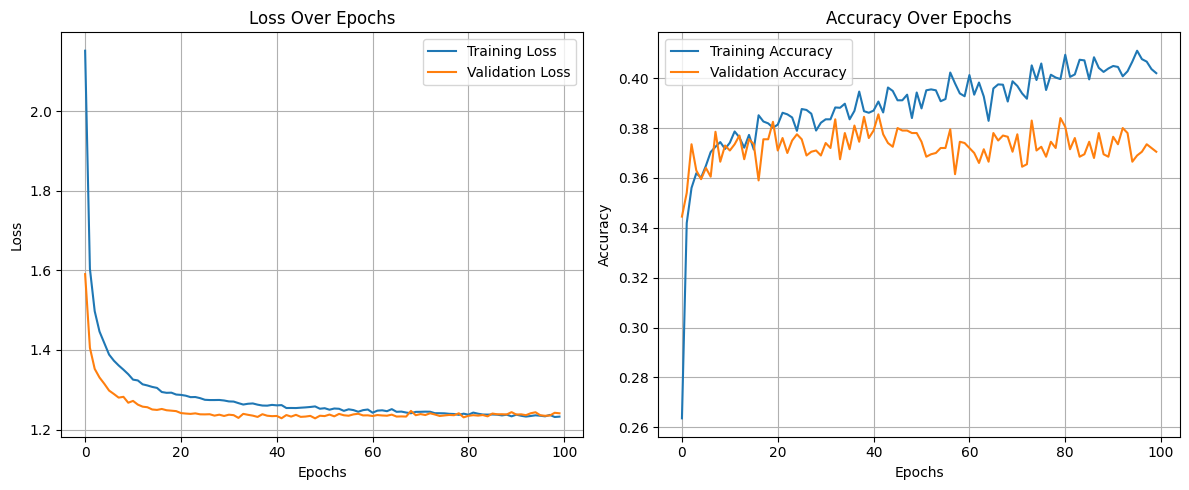

In [60]:
import matplotlib.pyplot as plt
# Plot the training performance

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.grid()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid()

# Show plots
plt.tight_layout()
plt.show()

In [61]:
model.save('pose_recommender.h5')